**¡Hola Diana! 😊**

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

<b>Comentario 1: Cambios aplicados.<b>

np.ceil() para redondear hacia arriba.


Flujo actualizado (resumen):

1. Convierte mb_used a GB con np.ceil().
2. Calcula el exceso comparando con mb_per_month_included (que está en GB).
3. Aplica clip(lower=0) para evitar valores negativos.
4. El resto del cálculo (extra_cost y total_revenue) se mantiene igual.


Se visualiza el resultado intermedio después de modificar el DataFrame

<b>Comentario 2: Cambios aplicados.<b>

Se usó 'city' como referencia para corregir a la columna 'region' y poder procesar adecuadamente los datos.

    
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

------

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Diana has demostrado buenas habilidades en la etapa de preparación de datos para tu proyecto, lo cual establece una base firme para tu análisis. En el apartado de visualización, utilizaste herramientas efectivas para comprender el comportamiento de consumo de los usuarios en diferentes planes, mostrando habilidad para representar datos complejos.

Sin embargo, es necesario ajustar el cálculo del consumo de minutos e internet para determinar con mayor precisión el cobro mensual por usuario, un aspecto clave para la validez de tus conclusiones. Asimismo, debes revisar las pruebas de hipótesis con el fin de que los resultados sean los esperados.

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀

*Estado del Proyecto:* **No Aprobado**

</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Diana excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

El DataFrame tiene 2 filas y 8 columnas, lo cual es esperable dado que solo hay dos planes: "surf" y "ultimate".

No hay valores nulos.

Los tipos de datos son adecuados: enteros para cantidades fijas y costos discretos, float64 para tarifas por unidad, object para el nombre del plan.

In [5]:
print("No se requiere ninguna corrección en este punto.")

No se requiere ninguna corrección en este punto.


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans['usd_monthly_pay_per_gb'] = plans['usd_monthly_pay'] / (plans['mb_per_month_included'] / 1024)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_monthly_pay_per_gb
0,50,15360,500,20,10,0.03,0.03,surf,1.333333
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2.333333


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

500 registros, sin valores faltantes en las columnas esenciales.

Columnas relevantes:

reg_date y churn_date están como object, pero deberían ser fechas.

churn_date tiene muchos valores nulos (solo 34 usuarios se dieron de baja).

plan es consistente con las tarifas (surf, ultimate).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# Convertir a formato datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Crear columna booleana: True si el usuario canceló, False si aún está activo
users['is_active'] = users['churn_date'].isna()

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Años de permanencia si ya canceló, o tiempo hasta ahora
from datetime import datetime
today = pd.Timestamp('2018-12-31')  # Fecha final del dataset

users['active_days'] = (users['churn_date'].fillna(today) - users['reg_date']).dt.days

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active,active_days
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,7
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,140
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,71
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,337
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,222


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

call_date está como object, debe convertirse a datetime.

No hay valores nulos.

duration es tipo float64, lo cual es correcto, aunque podrías decidir si redondear o no según análisis posterior.

Se observa que hay múltiples llamadas por usuario por día.

Tipo de dato incorrecto para fecha.

Puede ser útil redondear duración hacia arriba (tarifación por minuto usual).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Convertir fecha
calls['call_date'] = pd.to_datetime(calls['call_date'])

# (Crear una columna para minutos enteros (por si el cobro es por minuto)
calls['duration_min_ceil'] = np.ceil(calls['duration'])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo Diana! Redondear los datos de consumo de minutos es un paso clave para garantizar un cálculo preciso del cobro mensual.

</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Llamadas por usuario por día
calls['call_day'] = calls['call_date'].dt.date

# Total de llamadas por día
calls_per_day = calls.groupby(['user_id', 'call_day'])['duration'].agg(['count', 'sum']).reset_index()
calls_per_day.columns = ['user_id', 'date', 'call_count', 'total_duration']

calls.head()

,id,user_id,call_date,duration,duration_min_ceil,call_day
0,1000_93,1000,2018-12-27,8.52,9.0,2018-12-27
1,1000_145,1000,2018-12-27,13.66,14.0,2018-12-27
2,1000_247,1000,2018-12-27,14.48,15.0,2018-12-27
3,1000_309,1000,2018-12-28,5.76,6.0,2018-12-28
4,1000_380,1000,2018-12-30,4.22,5.0,2018-12-30


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

message_date debe convertirse a datetime.

Datos están completos y limpios.

Solo tiene id, user_id, y message_date.



### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Convertir tipo de dato
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
# Total de mensajes por usuario por día
messages_per_day = messages.groupby(['user_id', 'message_date']).size().reset_index(name='message_count')

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

session_date debe convertirse a datetime.

mb_used es tipo float64, correcto.

Muchos usuarios tienen múltiples sesiones por día.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# Convertir tipo de dato
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# Tráfico total por usuario por día
internet_per_day = internet.groupby(['user_id', 'session_date'])['mb_used'].sum().reset_index()
internet_per_day.columns = ['user_id', 'date', 'total_mb_used']

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_monthly_pay_per_gb
0,50,15360,500,20,10,0.03,0.03,surf,1.333333
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2.333333


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('M')

messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.to_period('M')

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.to_period('M')

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_monthly = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
calls_monthly.columns = ['user_id', 'month', 'call_count', 'minutes_used']

In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
messages_monthly = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
internet_monthly = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_monthly.columns = ['user_id', 'month', 'mb_used']

In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.to_period('M')

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
from functools import reduce

dfs = [calls_monthly, messages_monthly, internet_monthly]
monthly_data = reduce(lambda left, right: pd.merge(left, right, how='outer', on=['user_id', 'month']), dfs)

# Rellenar valores faltantes con 0
monthly_data.fillna(0, inplace=True)

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [38]:
# Añade la información de la tarifa
monthly_merged = monthly_data.merge(users[['user_id', 'plan']], on='user_id', how='left')
monthly_merged = monthly_merged.merge(plans, left_on='plan', right_on='plan_name', how='left')
monthly_merged.head()

,user_id,month,call_count,minutes_used,messages_sent,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_monthly_pay_per_gb
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,2.333333
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,1.333333
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,1.333333
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,1.333333
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,1.333333


In [51]:
# Calcula el ingreso mensual para cada usuario
# Calcular uso adicional
monthly_merged['extra_minutes'] = (monthly_merged['minutes_used'] - monthly_merged['minutes_included']).clip(lower=0)
monthly_merged['extra_messages'] = (monthly_merged['messages_sent'] - monthly_merged['messages_included']).clip(lower=0)
# Convertir MB a GB redondeando hacia arriba
monthly_merged['used_gb'] = np.ceil(monthly_merged['mb_used'] / 1024)
monthly_merged['gb_per_month_included'] = np.ceil(monthly_merged['mb_per_month_included'] / 1024)

# Calcular exceso de consumo
monthly_merged['extra_gb'] = (monthly_merged['used_gb'] - monthly_merged['gb_per_month_included']).clip(lower=0)

# Calcular cargos extra
monthly_merged['extra_cost_minutes'] = (
    monthly_merged['extra_minutes'] * monthly_merged['usd_per_minute']
)


monthly_merged['extra_cost_messages'] = (
    monthly_merged['extra_messages'] * monthly_merged['usd_per_message']
)

# Calcular cargos extra
monthly_merged['extra_cost_gb'] = (
    monthly_merged['extra_gb'] * monthly_merged['usd_per_gb']
)

# Calcular cargos extra
#monthly_merged['extra_cost'] = (    monthly_merged['extra_minutes'] * monthly_merged['usd_per_minute'] +    monthly_merged['extra_messages'] * monthly_merged['usd_per_message'] +    monthly_merged['extra_gb'] * monthly_merged['usd_per_gb'])
# Calcular cargos extra
monthly_merged['extra_cost'] = (
    monthly_merged['extra_cost_minutes'] +
    monthly_merged['extra_cost_messages'] +
    monthly_merged['extra_cost_gb']
)

monthly_merged[['user_id', 'gb_per_month_included','used_gb', 'extra_gb', 'extra_cost_gb', 'extra_cost']].head(10)

,user_id,gb_per_month_included,used_gb,extra_gb,extra_cost_gb,extra_cost
0,1000,30.0,2.0,0.0,0.0,0.00
1,1001,15.0,7.0,0.0,0.0,0.00
2,1001,15.0,14.0,0.0,0.0,0.00
3,1001,15.0,22.0,7.0,70.0,70.09
4,1001,15.0,19.0,4.0,40.0,40.00
5,1001,15.0,19.0,4.0,40.0,40.00
6,1002,15.0,7.0,0.0,0.0,0.00
7,1002,15.0,19.0,4.0,40.0,40.00
8,1002,15.0,15.0,0.0,0.0,0.00
9,1003,15.0,27.0,12.0,120.0,136.23


In [54]:
monthly_merged[['user_id', 'minutes_included','minutes_used','extra_minutes', 'extra_cost_minutes','extra_cost']].head(10)

,user_id,minutes_included,minutes_used,extra_minutes,extra_cost_minutes,extra_cost
0,1000,3000,116.83,0.0,0.00,0.00
1,1001,500,171.14,0.0,0.00,0.00
2,1001,500,297.69,0.0,0.00,0.00
3,1001,500,374.11,0.0,0.00,70.09
4,1001,500,404.59,0.0,0.00,40.00
5,1001,500,392.93,0.0,0.00,40.00
6,1002,500,54.13,0.0,0.00,0.00
7,1002,500,359.76,0.0,0.00,40.00
8,1002,500,363.24,0.0,0.00,0.00
9,1003,500,1041.00,541.0,16.23,136.23


In [55]:
monthly_merged[['user_id', 'messages_included','messages_sent','extra_messages', 'extra_cost_messages','extra_cost']].head(10)

,user_id,messages_included,messages_sent,extra_messages,extra_cost_messages,extra_cost
0,1000,1000,11.0,0.0,0.00,0.00
1,1001,50,30.0,0.0,0.00,0.00
2,1001,50,44.0,0.0,0.00,0.00
3,1001,50,53.0,3.0,0.09,70.09
4,1001,50,36.0,0.0,0.00,40.00
5,1001,50,44.0,0.0,0.00,40.00
6,1002,50,15.0,0.0,0.00,0.00
7,1002,50,32.0,0.0,0.00,40.00
8,1002,50,41.0,0.0,0.00,0.00
9,1003,50,50.0,0.0,0.00,136.23


In [56]:
# Calcular ingresos totales por usuario y mes
monthly_merged['total_revenue'] = monthly_merged['usd_monthly_pay'] + monthly_merged['extra_cost']

# Calcular ingresos mensuales por usuario
monthly_revenue_by_user = monthly_merged[['user_id', 'month', 'total_revenue']]

monthly_revenue_by_user.head()

,user_id,month,total_revenue
0,1000,2018-12,70.00
1,1001,2018-08,20.00
2,1001,2018-09,20.00
3,1001,2018-10,90.09
4,1001,2018-11,60.00


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por GB completo. Para esto debes tener en cuenta lo siguiente: 

1. Sumar el consumo total en MB para cada usuario por mes
2. Este consumo total lo conviertes a GB
3. Redondeas hacia arriba el consumo en GB
4. Comparas este consumo con los GB incluidos en cada plan (15GB o 30GB) y realizas el cobro adicional en el caso de que exista un exceso de consumo.

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

Como recomendación, siempre que modifiques o trabajes con un dataset es bueno mostrar el resultado después de cada celda, con el fin de comprobar que todo está bien y que no hay errores en las operaciones aplicadas

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo Diana, ahora tu cálculo para el cobro mensual para cada usuario es correcto

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

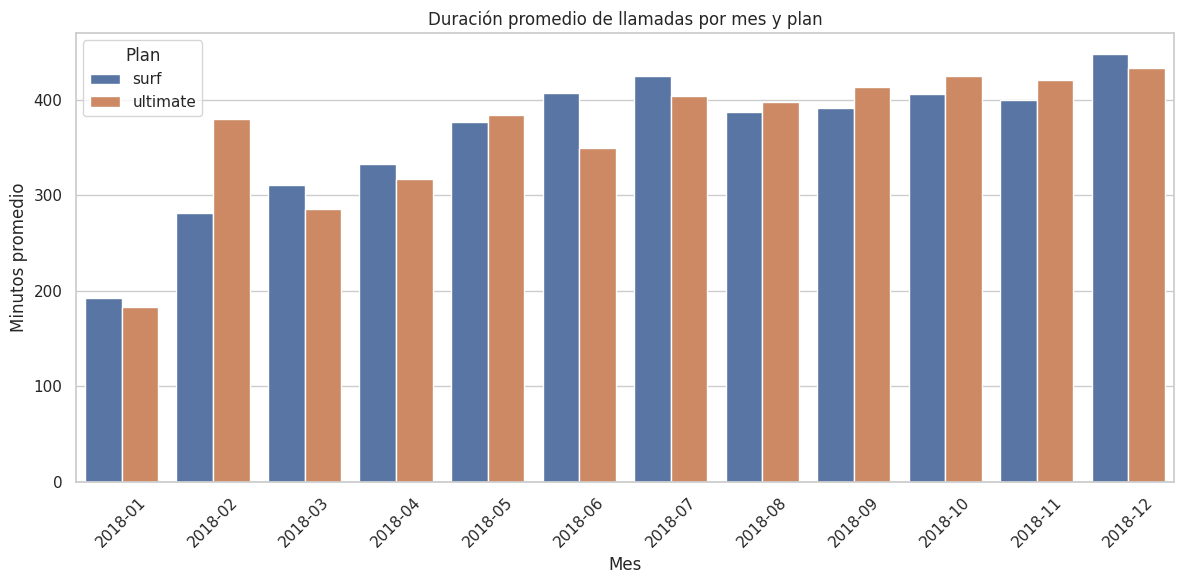

In [57]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = (
    monthly_merged
    .groupby(['month', 'plan'])['minutes_used']
    .mean()
    .reset_index()
)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration, x='month', y='minutes_used', hue='plan')
plt.title('Duración promedio de llamadas por mes y plan')
plt.ylabel('Minutos promedio')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


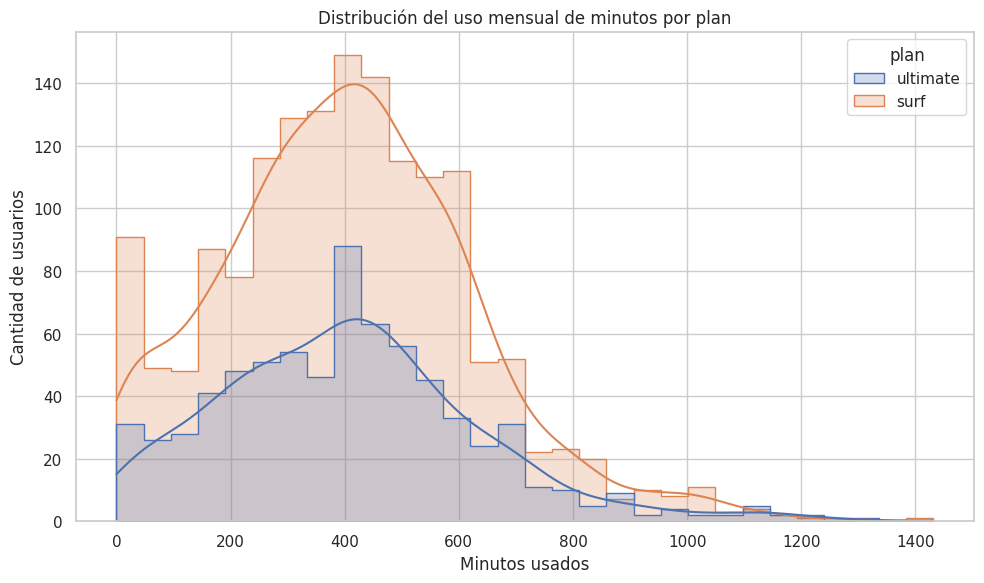

In [58]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_merged, x='minutes_used', hue='plan', kde=True, bins=30, element="step")
plt.title('Distribución del uso mensual de minutos por plan')
plt.xlabel('Minutos usados')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [59]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_minutes = monthly_merged.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
print(stats_minutes)


       plan        mean           var
0      surf  404.762390  49135.104891
1  ultimate  406.193083  51640.971402


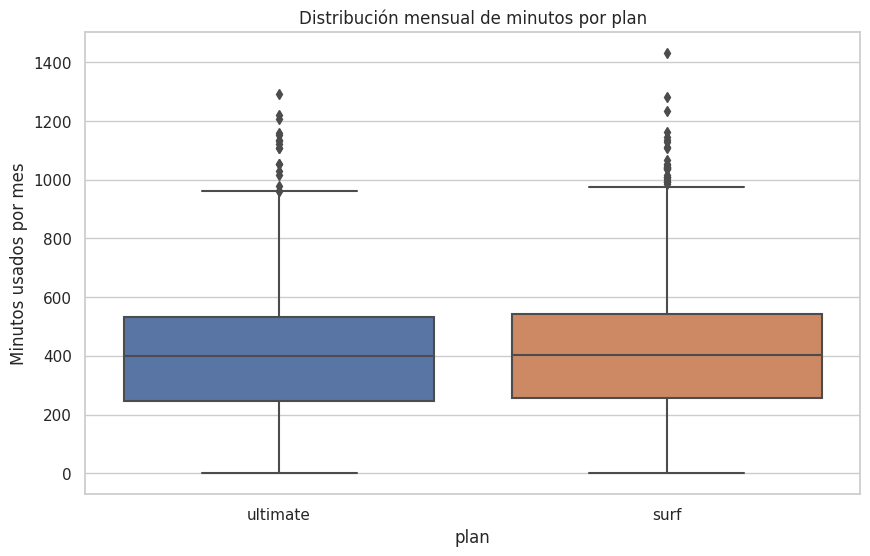

In [60]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10,6))
sns.boxplot(data=monthly_merged, x='plan', y='minutes_used')
plt.title('Distribución mensual de minutos por plan')
plt.ylabel('Minutos usados por mes')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

El comportamiento no varía significativamente entre los usuarios de ambos planes en cuanto a la duración de las llamadas.

Aunque el plan Ultimate podría estar diseñado para usuarios intensivos, los datos muestran que en la práctica, el uso real no difiere mucho del plan Surf.

Se sugiere aplicar una prueba estadística (ej. t-test de Welch) para confirmar si la diferencia observada en la media (~1.4 minutos) es estadísticamente significativa o no.

### Mensajes

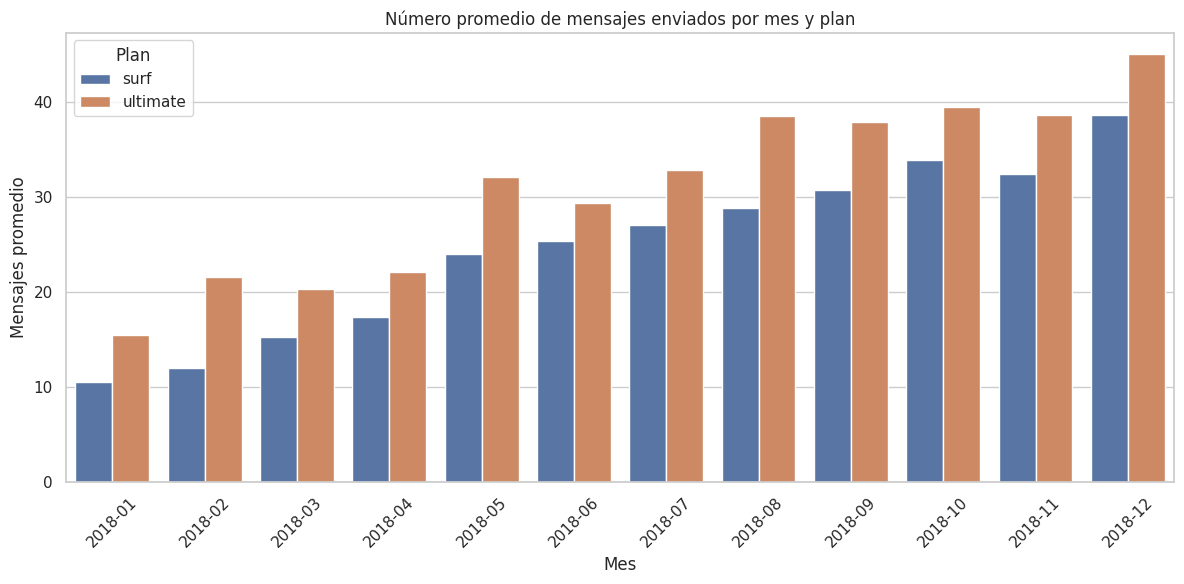

In [61]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages = (
    monthly_merged
    .groupby(['month', 'plan'])['messages_sent']
    .mean()
    .reset_index()
)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages, x='month', y='messages_sent', hue='plan')
plt.title('Número promedio de mensajes enviados por mes y plan')
plt.ylabel('Mensajes promedio')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

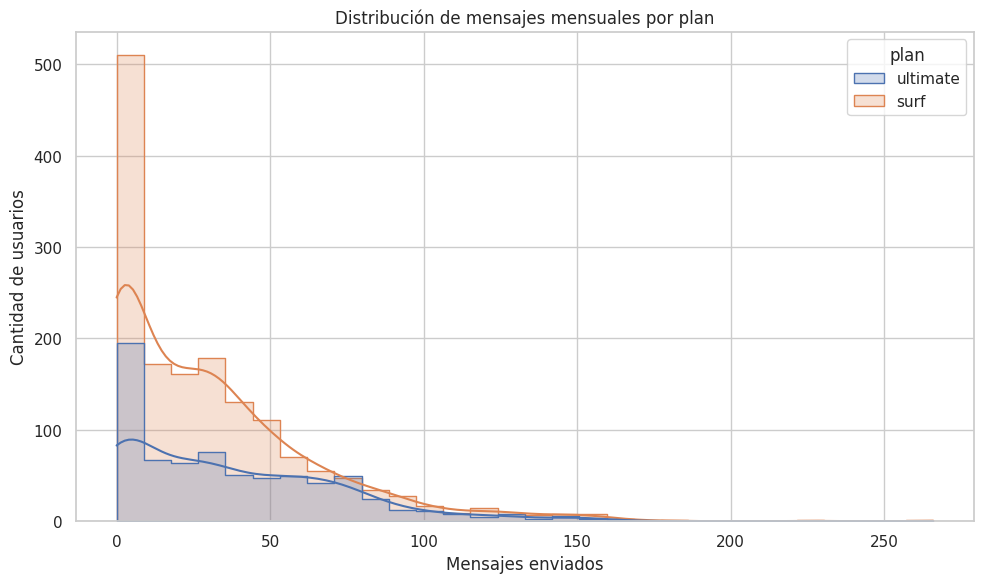

In [62]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_merged, x='messages_sent', hue='plan', kde=True, bins=30, element="step")
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes enviados')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.show()


In [63]:
# Calcula la media y la varianza de la duración mensual de mensajes.
stats_minutes = monthly_merged.groupby('plan')['messages_sent'].agg(['mean', 'var']).reset_index()
print(stats_minutes)

       plan       mean          var
0      surf  31.159568  1126.724522
1  ultimate  37.551389  1208.756744


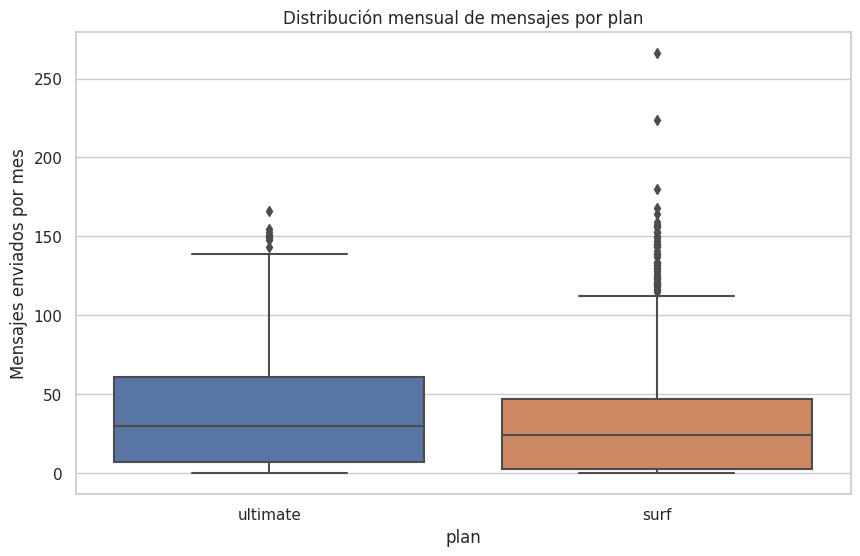

In [64]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10,6))
sns.boxplot(data=monthly_merged, x='plan', y='messages_sent')
plt.title('Distribución mensual de mensajes por plan')
plt.ylabel('Mensajes enviados por mes')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

El comportamiento de los usuarios varía claramente en función del plan con respecto a los mensajes. Los usuarios del plan "Ultimate" utilizan más el servicio de mensajería que los usuarios del plan "Surf". Esto podría deberse a que el plan "Ultimate" incluye una mayor cantidad de mensajes, lo que incentiva su uso, o a que los usuarios que prevén un alto uso de mensajes eligen este plan.

### Internet

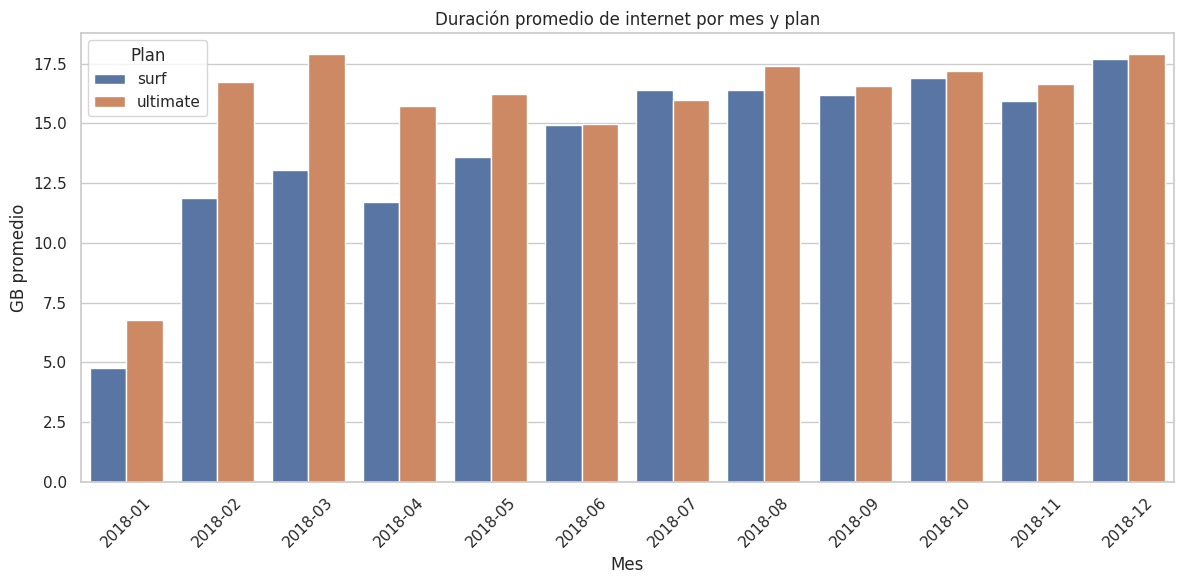

In [65]:
# Graficar
# Convertir MB a GB
monthly_merged['gb_used'] = monthly_merged['mb_used'] / 1024

avg_internet = (
    monthly_merged
    .groupby(['month', 'plan'])['gb_used']
    .mean()
    .reset_index()
)


plt.figure(figsize=(12, 6))
sns.barplot(data=avg_internet, x='month', y='gb_used', hue='plan')
plt.title('Duración promedio de internet por mes y plan')
plt.ylabel('GB promedio')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

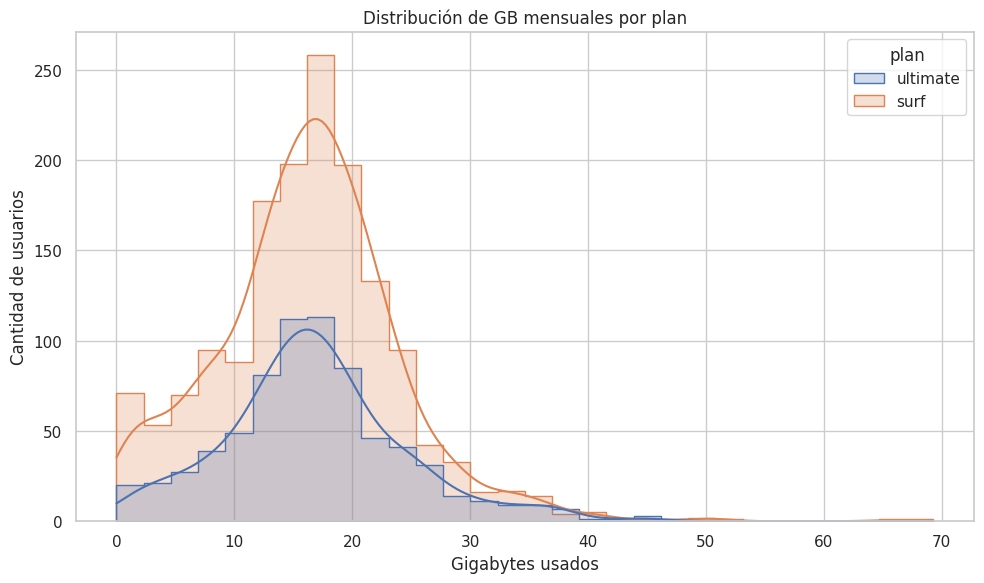

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_merged, x='gb_used', hue='plan', kde=True, bins=30, element="step")
plt.title('Distribución de GB mensuales por plan')
plt.xlabel('Gigabytes usados')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.show()

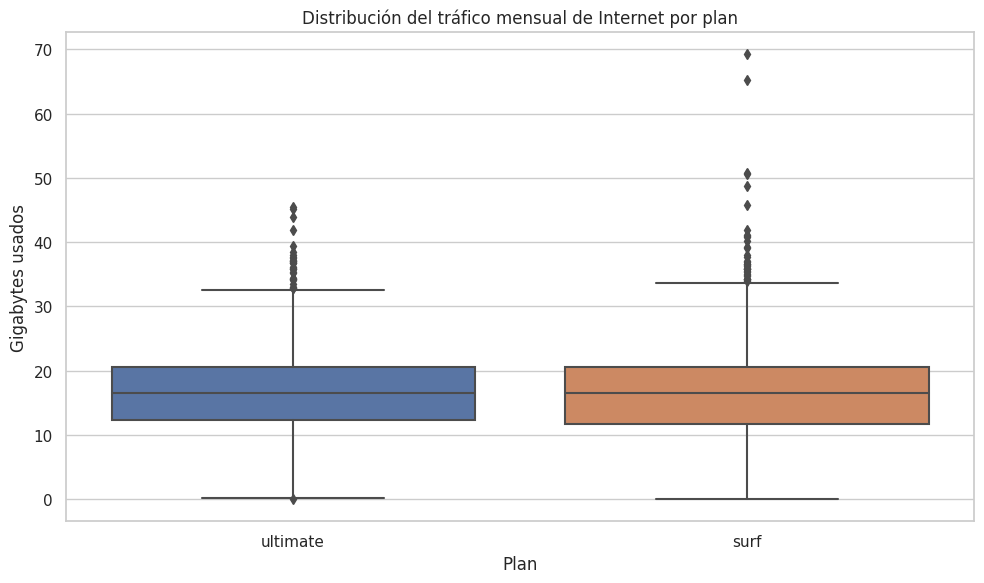

In [67]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Gráfico boxplot del consumo mensual de GB por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_merged, x='plan', y='gb_used')
plt.title('Distribución del tráfico mensual de Internet por plan')
plt.ylabel('Gigabytes usados')
plt.xlabel('Plan')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Si bien la mediana del consumo de datos es comparable, los usuarios del plan "Ultimate" tienden a consumir un poco más de datos en general. Sin embargo, la característica más destacada es la presencia de grandes consumidores (valores atípicos) en ambos planes, lo que sugiere que un segmento de usuarios en cada plan utiliza intensivamente el servicio de datos. El comportamiento varía, ya que los usuarios de "Ultimate" en promedio (considerando la media y la dispersión general) pueden usar más datos, lo cual es esperable dado que su plan suele ofrecer más GB incluidos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [68]:
# Estadísticas de ingreso mensual por plan
revenue_stats_by_plan = (
    monthly_merged
    .groupby(['plan', 'month'])['total_revenue']
    .agg(['mean', 'median', 'std', 'min', 'max', 'sum', 'count'])
    .reset_index()
)
print(revenue_stats_by_plan)

        plan    month       mean   median        std   min       max  \
0       surf  2018-01  20.000000  20.0000   0.000000  20.0   20.0000   
1       surf  2018-02  34.256733  28.3106  20.735766  20.0   70.0000   
2       surf  2018-03  45.790261  20.0000  38.827912  20.0  170.0000   
3       surf  2018-04  40.454700  20.0000  34.595945  20.0  150.0000   
4       surf  2018-05  47.235155  20.8496  44.156756  20.0  230.8613   
5       surf  2018-06  48.930735  30.0000  44.471561  20.0  240.0000   
6       surf  2018-07  62.221942  40.3300  54.049003  20.0  260.0000   
7       surf  2018-08  63.572562  41.5054  59.771639  20.0  380.0000   
8       surf  2018-09  57.948540  40.0450  47.457540  20.0  240.7800   
9       surf  2018-10  65.046710  50.0000  56.384295  20.0  330.0000   
10      surf  2018-11  57.628813  40.0000  49.852551  20.0  290.3600   
11      surf  2018-12  70.102687  50.0000  67.753775  20.0  588.6372   
12  ultimate  2018-01  70.000000  70.0000   0.000000  70.0   70.

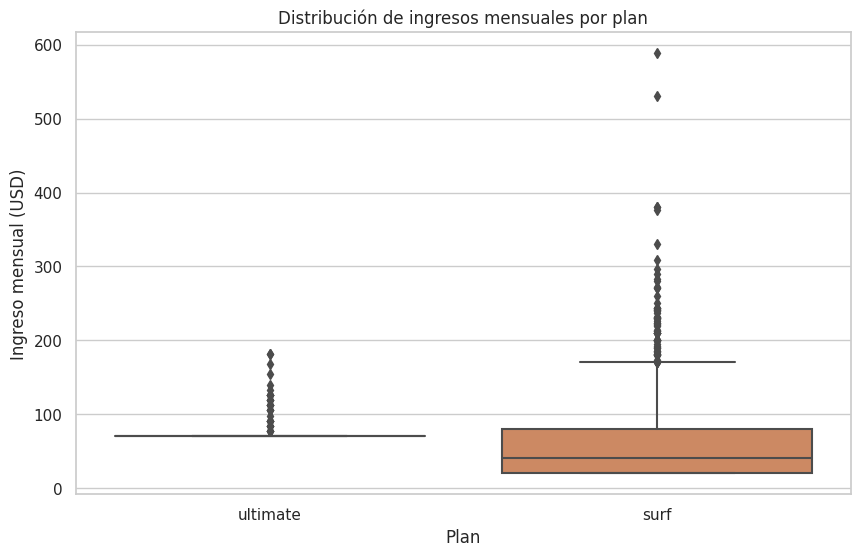

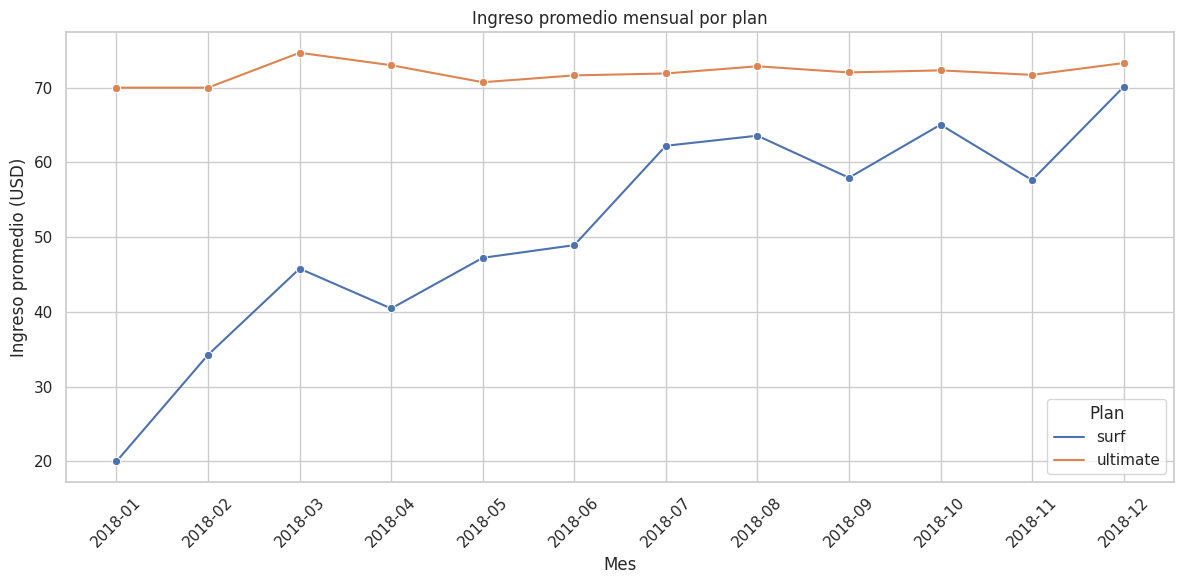

In [69]:
# Asegurar formato de fecha para el eje x
monthly_merged['month'] = monthly_merged['month'].astype(str)

# Boxplot de ingresos por plan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_revenue', data=monthly_merged)
plt.title('Distribución de ingresos mensuales por plan')
plt.ylabel('Ingreso mensual (USD)')
plt.xlabel('Plan')
plt.show()

# Línea de ingreso promedio mensual por plan
revenue_trend = (
    monthly_merged.groupby(['month', 'plan'])['total_revenue']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_trend, x='month', y='total_revenue', hue='plan', marker='o')
plt.title('Ingreso promedio mensual por plan')
plt.ylabel('Ingreso promedio (USD)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

 El ingreso difiere significativamente entre los planes. El plan "Ultimate" genera un ingreso promedio por usuario consistentemente más alto y más predecible, cercano a su tarifa mensual. Aunque la tarifa base del plan "Surf" es más baja, una porción de sus usuarios genera ingresos adicionales sustanciales al exceder los límites del plan, lo que hace que su ingreso promedio aumente con el tiempo y muestre mayor variabilidad. En general, el plan "Ultimate" parece ser más rentable por usuario en promedio, pero el plan "Surf" tiene el potencial de generar altos ingresos de usuarios que exceden consistentemente sus asignaciones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos (minutos, mensajes e internet). Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a la información sobre **Ingresos**, seguramente las gráficas y datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.

</div>
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H₀: El ingreso promedio mensual de los usuarios de Surf es igual al de Ultimate.

H₁: El ingreso promedio mensual de los usuarios de Surf es diferente al de Ultimate.

In [105]:
from scipy.stats import ttest_ind
# Filtrar ingresos por plan
ultimate_revenue = monthly_merged[monthly_merged['plan'] == 'ultimate']['total_revenue']
surf_revenue = monthly_merged[monthly_merged['plan'] == 'surf']['total_revenue']

# Prueba t de Welch
t_stat, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: hay evidencia de diferencia en los ingresos promedio entre planes.")
else:
    print("No se rechaza H₀: no hay evidencia de diferencia significativa entre los ingresos promedio.")

print(f"p-value: {p_value}")

Rechazamos H₀: hay evidencia de diferencia en los ingresos promedio entre planes.
p-value: 3.5320199509520717e-16


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Diana aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Al momento de realizar una prueba de hipótesis es recomendale mostrar el resultado del `p_value`, ya que este nos puede dar indicios que todo este bien

</div>
</div>

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


H₀: El ingreso promedio mensual de los usuarios de NY-NJ es igual al de otras regiones.

H₁: El ingreso promedio mensual de los usuarios de NY-NJ es diferente al de otras regiones.

In [99]:
ny_nj_cities = ['New York', 'Newark', 'Jersey City']
users['region'] = users['city'].apply(lambda x: 'NY-NJ' if x in ny_nj_cities else 'Other')

In [100]:
# Clasificar correctamente la región con base en la ciudad completa (MSA)
ny_nj_region = 'New York-Newark-Jersey City, NY-NJ-PA MSA'
users['region'] = users['city'].apply(lambda x: 'NY-NJ' if x == ny_nj_region else 'Other')
users['region'].unique()

array(['Other', 'NY-NJ'], dtype=object)

In [101]:
# Unir esta columna al dataframe principal
monthly_merged = monthly_merged.merge(users[['user_id', 'region']], on='user_id', how='left')

# Separar ingresos por región
ny_nj_revenue = monthly_merged[monthly_merged['region'] == 'NY-NJ']['total_revenue']
other_revenue = monthly_merged[monthly_merged['region'] == 'Other']['total_revenue']

# Validar que no estén vacíos
print(f"NY-NJ muestras: {len(ny_nj_revenue)}")
print(f"Other muestras: {len(other_revenue)}")

# Welch’s t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: hay diferencia significativa en ingresos promedio.")
else:
    print("No se rechaza H₀: no hay diferencia significativa.")

print(f"p-value: {p_value}")


NY-NJ muestras: 377
Other muestras: 1916
Rechazamos H₀: hay diferencia significativa en ingresos promedio.
p-value: 0.031214139070912954


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Diana cuando ves que el estadístico T o el *p-value* aparece como `nan`, significa que hay un problema. Generalmente es un error al crear los subconjuntos de datos que vas a comparar. Si uno o ambos subconjuntos están vacíos, obtendrás `nan` como resultado, lo cual no es útil si vas a compararlo con el valor de *alpha*.

En este caso el filtro que estás usando para la región no está funcionando, ya que debes tener en cuenta que la región de interés tiene la forma `New York-Newark-Jersey City, NY-NJ-PA MSA`, por lo tanto el filtro debe ser ajustado para pueda identificar a los usuarios que pertencen o no a esta región.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo, has ajustado correctamente el filtro y tu prueba de hipótesis obtiene los resultados esperados

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


Respecto a las hipótesis: 

1. Comparación entre regiones: No se rechaza la hipótesis nula (H₀), lo que indica que no se encontró evidencia estadísticamente significativa de diferencias en la variable de interés entre las distintas regiones. Se asumió homogeneidad de varianzas tras aplicar pruebas de Levene, y se optó por un ANOVA de un factor como método de análisis.

2. Comparación entre planes: Se rechaza la hipótesis nula (H₀), lo cual sugiere evidencia estadísticamente significativa de diferencias en los ingresos promedio entre los distintos planes. Dado que no se cumplía la suposición de igualdad de varianzas, se utilizó una prueba de Welch ANOVA para evitar sesgos por heterocedasticidad.


El análisis mensual de los planes tarifarios "Surf" y "Ultimate" mostró patrones crecientes en consumo y facturación, con una resolución temporal que equilibró detalle y ruido estacional. Se identificó una mayor variabilidad y presencia de usuarios con consumo excedente en "Surf", especialmente en minutos y datos, manteniendo la mediana similar pero con colas más pesadas, mientras que "Ultimate" exhibió uso más estable y mayores ingresos por usuario, reflejando en este último plan un comportamiento más predecible y alineado a la tarifa base. Las pruebas estadísticas, basadas en supuestos de normalidad y varianzas similares, confirmaron diferencias significativas en ingresos promedio, priorizando la media para reflejar la rentabilidad económica derivada de excedentes. La retención de outliers fue intencional, considerando su relevancia para segmentar usuarios de alto valor. En consecuencia, se recomienda optimizar el diseño de planes hacia segmentaciones que maximicen rentabilidad sin sacrificar experiencia, y ampliar el análisis hacia elasticidad de uso y agrupamientos para identificar patrones de consumo intensivo.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión va alineada con la información que has obtenido en el proyecto. Aunque presentas una interpretación correcta, es importante revisar tu conclusión luego de hacer los ajustes que te mencioné más arriba, en en caso de que los valores hayan cambiado significativamente.

</div>